#!/usr/bin/env python

__author__ = "Ivan Gruber"
__version__ = "1.0.0"
__maintainer__ = "Ivan Gruber"
__email__ = "ivan.gruber@seznam.cz"

"""
HoG calculation over depth data
"""

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import  scipy.stats as stats
import cv2
import h5py
from skimage.feature import hog
from skimage import data, exposure

In [35]:
fd, hog_image = hog(pom, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(3, 3), visualise=True)
print(fd.shape)

(1152,)


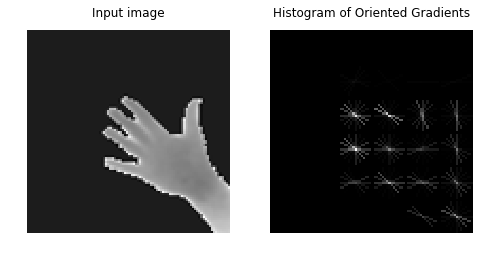

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(pom, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [68]:
data_path = '/storage/plzen1/home/grubiv/AMIR/SPECOM2018/annotations/train_h5/'
filename = 'trainN_3.h5'
f_out = data_path+filename
with h5py.File(f_out,'r') as fr:
    print('Byl nacten soubor: '+f_out)
    X = fr['data'][:]
    y = fr['label'][:]
print(X.shape)
print(y.shape)

Byl nacten soubor: /storage/plzen1/home/grubiv/AMIR/SPECOM2018/annotations/train_h5/trainN_3.h5
(97729, 96, 96)
(97729,)


In [62]:
HoGs = np.zeros((X.shape[0], 1152))
for i in range(0, X.shape[0]):
    HoGs[i,:] = hog(X[i,:,:], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(3, 3))    

In [63]:
f_new = '/storage/plzen1/home/grubiv/AMIR/SPECOM2018/annotations/HoGs/HoG_'+filename
with h5py.File(f_new, 'w') as fw:
    fw.create_dataset('data', (HoGs.shape[0], HoGs.shape[1]), dtype=np.float32)
    fw.create_dataset('label', (y.shape[0],), dtype=int)
    fw['data'][:] = HoGs[:,:]
    fw['label'][:] = y[:]
    print('Soubor: '+f_new+' byl ulozen!')

Soubor: /storage/plzen1/home/grubiv/AMIR/SPECOM2018/annotations/HoGs/HoG_trainN_3.h5 byl ulozen!


In [14]:
data_path = '/storage/plzen1/home/grubiv/AMIR/SPECOM2018/annotations/test_h5/'
filename = 'testN_1.h5'
f_out = data_path+filename
with h5py.File(f_out,'r') as fr:
    print('Byl nacten soubor: '+f_out)
    X = fr['data'][:]
    y = fr['label'][:]
print(X.shape)
print(y.shape)

Byl nacten soubor: /storage/plzen1/home/grubiv/AMIR/SPECOM2018/annotations/test_h5/testN_1.h5
(29728, 96, 96)
(29728,)


In [15]:
HoGs = np.zeros((X.shape[0], 1152))
for i in range(0, X.shape[0]):
    HoGs[i,:] = hog(X[i,:,:], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(3, 3)) 

In [16]:
f_new = '/storage/plzen1/home/grubiv/AMIR/SPECOM2018/annotations/HoGs/HoG_'+filename
with h5py.File(f_new, 'w') as fw:
    fw.create_dataset('data', (HoGs.shape[0], HoGs.shape[1]), dtype=np.float32)
    fw.create_dataset('label', (y.shape[0],), dtype=int)
    fw['data'][:] = HoGs[:,:]
    fw['label'][:] = y[:]
    print('Soubor: '+f_new+' byl ulozen!')

Soubor: /storage/plzen1/home/grubiv/AMIR/SPECOM2018/annotations/HoGs/HoG_testN_1.h5 byl ulozen!


In [3]:
data_path = '/storage/plzen1/home/grubiv/AMIR/SPECOM2018/annotations/HoGs/'
filename = 'HoG_trainN_3.h5'
f_out = data_path+filename
with h5py.File(f_out,'r') as fr:
    print('Byl nacten soubor: '+f_out)
    X = fr['data'][:]
    y = fr['label'][:]
print(X.shape)
print(y.shape)

Byl nacten soubor: /storage/plzen1/home/grubiv/AMIR/SPECOM2018/annotations/HoGs/HoG_trainN_3.h5
(97729, 1152)
(97729,)


In [ ]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X, y) 

In [9]:
data_path = '/storage/plzen1/home/grubiv/AMIR/SPECOM2018/annotations/HoGs/'
filename = 'HoG_testN_3.h5'
f_out = data_path+filename
with h5py.File(f_out,'r') as fr:
    print('Byl nacten soubor: '+f_out)
    X = fr['data'][:]
    y = fr['label'][:]
print(X.shape)
print(y.shape)

Byl nacten soubor: /storage/plzen1/home/grubiv/AMIR/SPECOM2018/annotations/HoGs/HoG_testN_3.h5
(33114, 1152)
(33114,)


In [10]:
f = h5py.File(f_out, 'r')
f.keys()

[u'data', u'label']